**Uploading Train, Test and All = Train + Test datasets**

In [ ]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
newsgroups = fetch_20newsgroups(subset='all')

In [ ]:
! pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 25.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=450eec38ac14ab1a150814d82849955569c8f1d6364c5098ab02ec0bbd7b50b1
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [ ]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from langdetect import detect
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
newsgroups = fetch_20newsgroups(subset='all')

In [ ]:
#Checking and verifying for target variables in train and test datasets

train_targets = list(newsgroups_train.target_names)
test_targets = list(newsgroups_test.target_names)

if train_targets == test_targets:
    print("The train_targets and test_targets lists are the same.\n")
    print("Printing the target names:")
    for train_target, test_target in zip(train_targets, test_targets):
        print("{:<25s} {}".format(train_target, test_target))
else:
    print("The train_targets and test_targets lists are not the same.")


The train_targets and test_targets lists are the same.

Printing the target names:
alt.atheism               alt.atheism
comp.graphics             comp.graphics
comp.os.ms-windows.misc   comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware  comp.sys.ibm.pc.hardware
comp.sys.mac.hardware     comp.sys.mac.hardware
comp.windows.x            comp.windows.x
misc.forsale              misc.forsale
rec.autos                 rec.autos
rec.motorcycles           rec.motorcycles
rec.sport.baseball        rec.sport.baseball
rec.sport.hockey          rec.sport.hockey
sci.crypt                 sci.crypt
sci.electronics           sci.electronics
sci.med                   sci.med
sci.space                 sci.space
soc.religion.christian    soc.religion.christian
talk.politics.guns        talk.politics.guns
talk.politics.mideast     talk.politics.mideast
talk.politics.misc        talk.politics.misc
talk.religion.misc        talk.religion.misc


In [ ]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [ ]:
newsgroups_train['target']

array([7, 4, 4, ..., 3, 1, 8])

## **Data Exploration**

In [ ]:
print("Training set shape:", len(newsgroups_train.filenames))
print("Test set shape:", len(newsgroups_test.filenames))
print("Test + train  set shape:", len(newsgroups.filenames))
print("Categories:", ', '.join(newsgroups.target_names))

Training set shape: 11314
Test set shape: 7532
Test + train  set shape: 18846
Categories: alt.atheism, comp.graphics, comp.os.ms-windows.misc, comp.sys.ibm.pc.hardware, comp.sys.mac.hardware, comp.windows.x, misc.forsale, rec.autos, rec.motorcycles, rec.sport.baseball, rec.sport.hockey, sci.crypt, sci.electronics, sci.med, sci.space, soc.religion.christian, talk.politics.guns, talk.politics.mideast, talk.politics.misc, talk.religion.misc


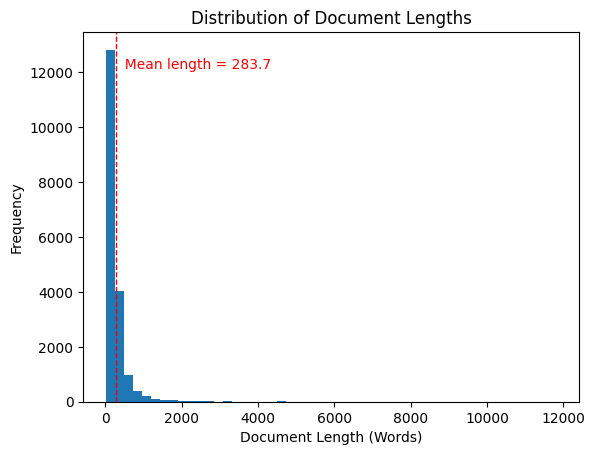

In [ ]:
doc_lengths = [len(doc.split()) for doc in newsgroups.data] # compute the length (in words) of each document in the dataset
plt.hist(doc_lengths, bins=50)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Document Length (Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Document Lengths')

# Add a vertical line at the mean document length
mean_length = sum(doc_lengths) / len(doc_lengths)
plt.axvline(x=mean_length, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_length + 5, plt.ylim()[1] * 0.9, f"  Mean length = {mean_length:.1f}", color='red')

plt.show()


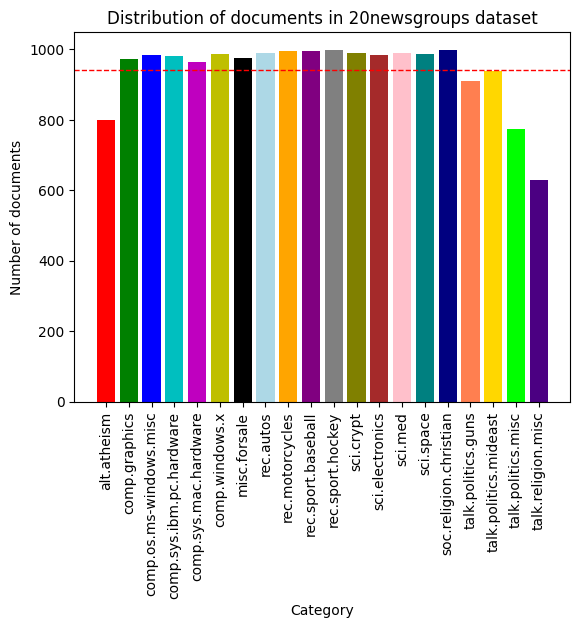

In [ ]:
categories, counts = np.unique(newsgroups.target, return_counts=True)

# Define a list of colors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'lightblue', 'orange', 'purple',
          'gray', 'olive', 'brown', 'pink', 'teal', 'navy', 'coral',
          'gold', 'lime', 'indigo']

# Plot the bar chart using the colors list
plt.bar(categories, counts, color=colors)

# Add x-tick labels and rotate them 90 degrees
plt.xticks(categories, newsgroups.target_names, rotation=90)

# Set the x and y labels and the title of the plot
plt.xlabel('Category')
plt.ylabel('Number of documents')
plt.title('Distribution of documents in 20newsgroups dataset')

# Plot an average line
mean_docs = sum(counts) / 20
plt.axhline(y=mean_docs, color='red', linestyle='dashed', linewidth=1)

# Show the plot
plt.show()

Documents are said to be distributed as fairly as possible however, as we can see from the above graph, certain categories contain considerably less documents than average.

In [ ]:
newsgroups2 = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

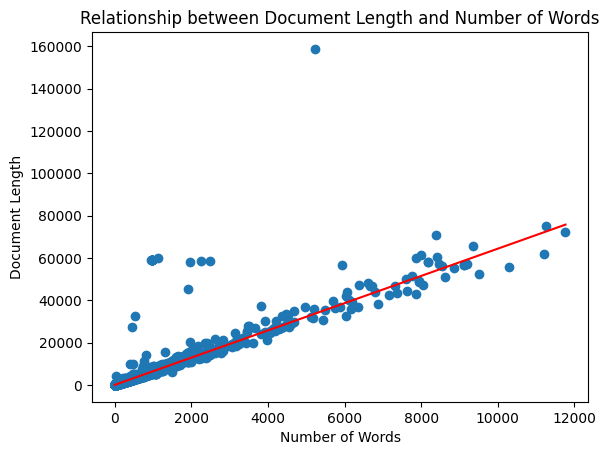

In [ ]:
# Get the number of words in each document
num_words = [len(text.split()) for text in newsgroups2.data]

# Get the length of each document
doc_length = [len(text) for text in newsgroups2.data]

# Create the scatter plot
plt.scatter(num_words, doc_length)
plt.xlabel('Number of Words')
plt.ylabel('Document Length')
plt.title('Relationship between Document Length and Number of Words')

# Plot a line
x_line = np.linspace(0, max(num_words), 1000)
y_line = x_line * np.mean(doc_length) / np.mean(num_words)
plt.plot(x_line, y_line, 'r-')

plt.show()
# the "document length" refers to the length of each document in terms of the number of characters, 
# the "number of words" refers to the total number of words in each document

A very little amount of anomolies can be seen here, therefore reinforcing our decision to not remove outliers before preprocessing.

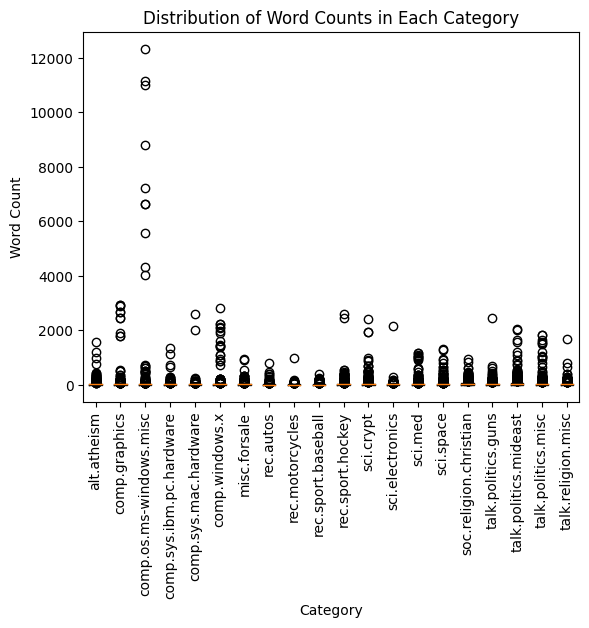

In [ ]:
# Create the count vectorizer with stop words and a maximum of 1000 features
count_vectorizer = CountVectorizer(stop_words='english', max_features=1000)

# Fit and transform the data
X = count_vectorizer.fit_transform(newsgroups2.data)

# Get the word counts for each category
categories = list(newsgroups2.target_names)
word_counts = [[] for _ in categories]
for i, category in enumerate(categories):
    # Get the indices of documents in this category
    idx = np.where(newsgroups2.target == i)[0]
    # Get the word counts for these documents
    counts = np.array(X[idx].sum(axis=1)).flatten()
    # Add the word counts to the list for this category
    word_counts[i] = counts

# Create the box plot
plt.boxplot(word_counts, labels=categories)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.title('Distribution of Word Counts in Each Category')
plt.show()

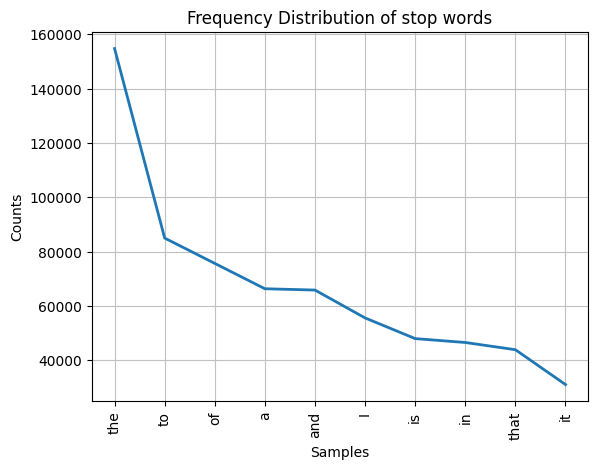

In [ ]:
# Obtain the stopwords
stop_words = set(stopwords.words('english'))

# Tokenize the data into words
words = []
for data in newsgroups2.data:
    words.append(nltk.word_tokenize(data))

# Filter out the stop words
filtered_words = [word for sublist in words for word in sublist if word.lower() in stop_words]

# Get a frequency distribution of the filtered words
freq_dist = nltk.FreqDist(filtered_words)

# Plot the frequency distribution
freq_dist.plot(10, title='Frequency Distribution of stop words')
plt.show()

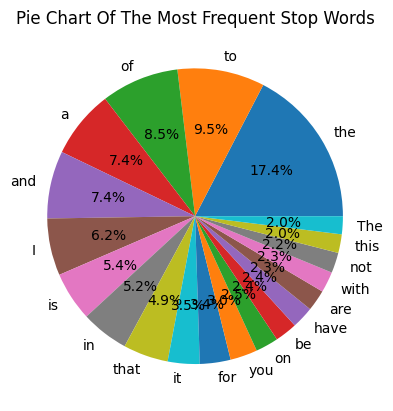

In [ ]:
# Get the top 10 most frequent stop words
top_stop_words = freq_dist.most_common(20)

# Create a list of labels and values for the pie chart
labels = [word[0] for word in top_stop_words]
values = [word[1] for word in top_stop_words]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart Of The Most Frequent Stop Words')
plt.show()

This pie chart gives us 99.9% of the stopwords. We can see that after the first ten (as shown is the previous line graph) the amount of occurences of each stopword gets considerably lower. Hence showing the first 10 are more relevant.

Checking for Slang words in the corpus

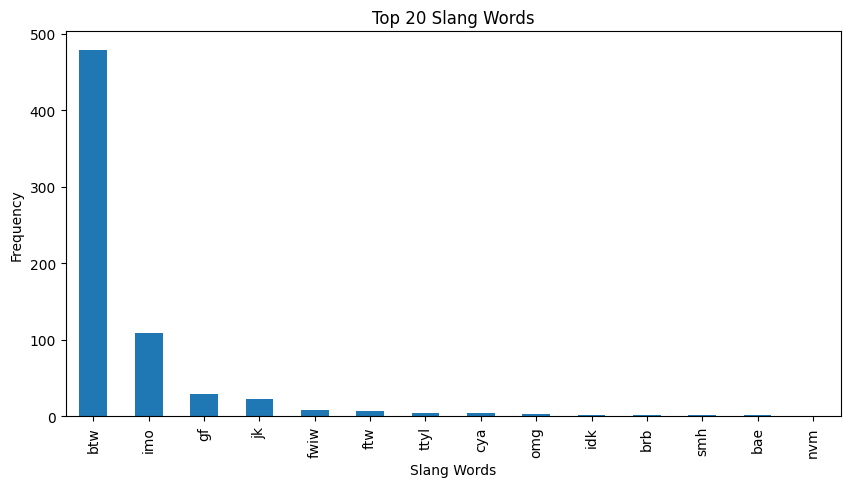

In [ ]:
# load the 20newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')

# preprocess the data
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

#Define slang words dictionary
slang_dict = {
    "bae": "before anyone else","brb": "be right back","btw": "by the way","cya": "see ya","fomo": "fear of missing out","ftw": "for the win",
    "fwiw": "for what it's worth","gf": "girlfriend","gtg": "got to go","hmu": "hit me up","idk": "I don't know","imo": "in my opinion","jk": 
    "just kidding","lol": "laugh out loud","nvm": "never mind","omg": "oh my god","rofl": "rolling on the floor laughing","smh": "shaking my head",
    "tbh": "to be honest","ttyl": "talk to you later"
}

# extract slang words
slang_words = []
for text in newsgroups.data:
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    for token in tokens:
        if token in slang_dict:
            slang_words.append(token)

# count frequency of slang words
word_freq = pd.Series(slang_words).value_counts().head(20)

# plot the frequency of slang words
plt.figure(figsize=(10,5))
word_freq.plot(kind='bar')
plt.title('Top 20 Slang Words')
plt.xlabel('Slang Words')
plt.ylabel('Frequency')
plt.show()

POS (Parts of Speech tagging)

-----------------------------------------------------------------------------------------------------------------------------------------------------
CD：cardinal digit
NNS：noun, plural
NN：noun, singular
JJ：adjective
NNP：proper noun, singular
-----------------------------------------------------------------------------------------------------------------------------------------------------


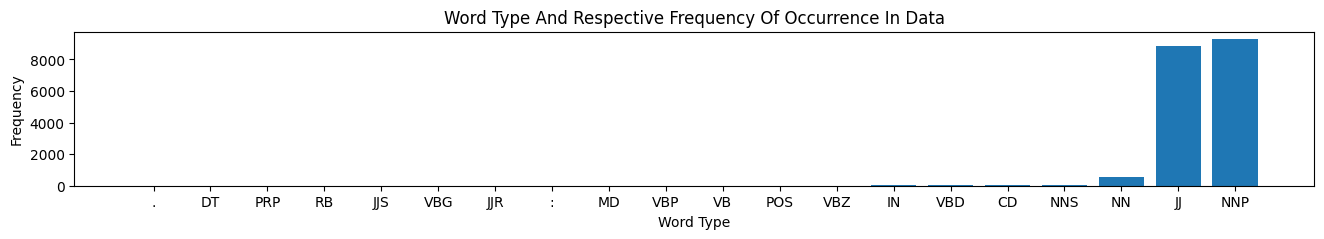

In [ ]:
POStaggedText = nltk.pos_tag(newsgroups2.data)

typeList = []
for wordType in POStaggedText:
    typeList.append(wordType[1])
wordsTypeFrequency = Counter(typeList) #Count Word Type Frequency
wordsTypeFrequency = {k: v for k, v in sorted(wordsTypeFrequency.items(), key=lambda item: item[1])}

label = list(wordsTypeFrequency.keys())
frequency = list(wordsTypeFrequency.values())
    
#Word Type Frequency Plot
plt.figure(figsize=(16, 2))
plt.bar(label, frequency)
plt.xlabel('Word Type')
plt.ylabel('Frequency')
plt.title('Word Type And Respective Frequency Of Occurrence In Data')

#PY

print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
print('CD：cardinal digit\nNNS：noun, plural\nNN：noun, singular\nJJ：adjective\nNNP：proper noun, singular')
print('-----------------------------------------------------------------------------------------------------------------------------------------------------')

##**Literature Review**

In [ ]:
text = newsgroups.data[0].replace('\n', '\n')
print(text)

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [ ]:
non_english_docs = []

for i, text in enumerate(newsgroups.data):
    lang = detect(text)
    if lang != 'en':
        non_english_docs.append(i)
        print(f"Non-English document detected in category {newsgroups.target_names[newsgroups.target[i]]} with document number {i}")

if not non_english_docs:
    print("No non-English documents were detected.")

Non-English document detected in category sci.electronics with document number 660
Non-English document detected in category sci.space with document number 1072
Non-English document detected in category rec.sport.hockey with document number 1761
Non-English document detected in category comp.os.ms-windows.misc with document number 1800
Non-English document detected in category comp.sys.ibm.pc.hardware with document number 2620
Non-English document detected in category comp.os.ms-windows.misc with document number 2694
Non-English document detected in category talk.politics.mideast with document number 2743
Non-English document detected in category comp.os.ms-windows.misc with document number 3059
Non-English document detected in category comp.os.ms-windows.misc with document number 3488
Non-English document detected in category comp.os.ms-windows.misc with document number 5017
Non-English document detected in category comp.os.ms-windows.misc with document number 5396
Non-English documen

In [ ]:
'''
Through manual inspection, it is found that the langdetect library occasionally has false positives or false negatives.
Therefore, we conclude that all documents are in English.
The following shows an example where the langdetect library incorrectly detects it as non-English.

'''
index = newsgroups.target_names.index('sci.electronics')
doc_num = 660

# Find the index of the document in the data array
doc_index = (newsgroups.target == index).nonzero()[0][doc_num]

# Access the text of the document
doc_text = newsgroups.data[doc_index]

# Print the text
print(doc_text)

From: karplus@cse.ucsc.edu (Kevin Karplus)
Subject: Re: decoupling caps - onboard
Organization: University of California, Santa Cruz
Lines: 38
Reply-To: karplus@ce.ucsc.edu (Kevin Karplus)
NNTP-Posting-Host: ararat.ucsc.edu


I've used on-chip capacitors to reduce ground-bounce noise on a small
systolic array chip that had 50pF loads on the clock lines.
(Design was in 2-micron n-well cmos, using the MOSIS scalable design rules.)
Here are some thoughts on the bypass capacitors:

1) They don't help much with simultaneous output switching--there is
	still a large inductance between the bypass capacitor and the
	load capacitor (on both the signal line and the ground
	return), so you still get ground and power line bounce. 

2) They do help a lot with on-chip loads, as I had with the high load
	on the clock lines. 

3) The transients you are trying to suppress are really high
	frequency, so forget about large areas of poly-thin-oxide-diff
	capacitors, since the RC time constant is too large

##**Preprocessing**

1)
**.Applying TF-IDF:** A Feature extraction technique is to represent each document as a vector of numerical features, where each feature corresponds to a term in the document. The value of each feature represents the importance of the term in the document, relative to its importance in the entire corpus of documents.Finally training and testing data are vectorized and preprocessed.
**Preprocess function:** .Remove non-alphabetic characters
.Convert to lowercase
.Tokenize text
.Remove stop words
.Lemmatize tokens
.Join tokens back into string

**NOTE FOR T3 MEMBERS: X_train_vectorized and X_test_vectorized can be used for further model implementation**

In [ ]:
!pip install nltk
!pip install scikit-learn
!pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 49.1 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import os
import re
import gensim
import gensim.downloader as api
import tensorflow as tf
from tensorflow import keras
from nltk.corpus import wordnet
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

Defining functions for following tasks: .Remove metadata .Tokenization .Stop word removal .Lemmatization .Lowercasing .Removing special characters and punctuation .remove_numbers

In [ ]:
# Load the dataset
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

# Remove metadata
def remove_metadata(text):
    metadata = ['From:', 'Subject:', 'Organization:', 'Lines:', 'Distribution:', 'Reply-To:', 'Summary:', 'Keywords:', 'Expires:', 'Sender:', 'News-Software:', 'Nntp-Posting-Host:', 'Article-I.D.:', 'Archive-Name:', 'Posting-Version:', 'References:', 'Xref:', 'Path:', 'Approved:', 'Supersedes:', 'Followup-To:', 'Date:', 'Message-ID:', 'Injection-Info:', 'NNTP-Posting-Date:', 'Content-Type:', 'Content-Transfer-Encoding:', 'In-Reply-To:', 'Followup-To:', 'Lines']
    for m in metadata:
        text = re.sub(r'^'+m+'.*\n?', '', text, flags=re.MULTILINE)
    return text

# Tokenization
def tokenize(text):
    tokenizer = RegexpTokenizer(r'\w+\'?\w+|\w+')
    return tokenizer.tokenize(text)

# Stop word removal
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [t for t in tokens if t not in stop_words]

# Lemmatization
def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(t) for t in tokens]

# Lowercasing
def lowercase(tokens):
    return [t.lower() for t in tokens]

# Removing special characters and punctuation
def remove_special_characters(tokens):
    return [re.sub(r'[^\w\s]','',t) for t in tokens]

# Removing numbers
def remove_numbers(tokens):
    return [re.sub(r'\d+', '', t) for t in tokens]

# Combine all the preprocessing steps into one function
def preprocess(text):
    # Remove meta-data
    text = remove_metadata(text)
    # Remove non-alphabetic characters
    text = re.sub('[^A-Za-z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    # Join tokens back into string
    text = ' '.join(lemmatized_tokens)
    return text

In [ ]:
# Example usage
document = newsgroups_train.data[0]
document = remove_metadata(document)
tokens = tokenize(document)
tokens = remove_stopwords(tokens)
tokens = lemmatize(tokens)
tokens = lowercase(tokens)
tokens = remove_special_characters(tokens)
tokens = remove_numbers(tokens)
document = ' '.join(tokens)
print(document)

i wondering anyone could enlighten car i saw day it  door sport car looked late  early  it called bricklin the door really small in addition front bumper separate rest body this i know if anyone tellme model name engine spec year production car made history whatever info funky looking car please e mail


In [ ]:
# Apply preprocessing to training and test data
X_train_preprocessed = [preprocess(text) for text in X_train]
X_test_preprocessed = [preprocess(text) for text in X_test]

In [ ]:
# Vectorize preprocessed data
# The vectorizer is configured to only keep the top 1000 most frequent terms in the dataset
# ignoring terms that appear in fewer than 2 documents or more than 95% of the documents
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train_preprocessed)  
X_test_vectorized = vectorizer.transform(X_test_preprocessed)

In [ ]:
y_train

array([7, 4, 4, ..., 3, 1, 8])

In [ ]:
#useful to see words

X_train_vectorized_df = pd.DataFrame(X_train_vectorized.todense())
X_train_vectorized_df.columns = sorted(vectorizer.vocabulary_)
X_train_vectorized_df.head()

aa  aaa  aaron   ab  abandon  abandoned  abbreviation  abc  abiding  \
0  0.0  0.0    0.0  0.0      0.0        0.0           0.0  0.0      0.0   
1  0.0  0.0    0.0  0.0      0.0        0.0           0.0  0.0      0.0   
2  0.0  0.0    0.0  0.0      0.0        0.0           0.0  0.0      0.0   
3  0.0  0.0    0.0  0.0      0.0        0.0           0.0  0.0      0.0   
4  0.0  0.0    0.0  0.0      0.0        0.0           0.0  0.0      0.0   

   ability  ...  zrmc   zt   zu  zur   zv  zvm   zw   zx   zy   zz  
0      0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2      0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4      0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 10000 columns]

In [ ]:
# Print out the first 50 preprocessed texts in the training set
for i in range(50):
    print(f'Text {i+1}: {X_train_preprocessed[i]}')

Text 1: wondering anyone could enlighten car saw day door sport car looked late early called bricklin door really small addition front bumper separate rest body know anyone tellme model name engine spec year production car made history whatever info funky looking car please e mail
Text 2: fair number brave soul upgraded si clock oscillator shared experience poll please send brief message detailing experience procedure top speed attained cpu rated speed add card adapter heat sink hour usage per day floppy disk functionality floppy especially requested summarizing next two day please add network knowledge base done clock upgrade answered poll thanks
Text 3: well folk mac plus finally gave ghost weekend starting life k way back sooo market new machine bit sooner intended looking picking powerbook maybe bunch question hopefully somebody answer anybody know dirt next round powerbook introduction expected heard c supposed make appearence summer heard anymore since access macleak wondering an

In [ ]:
# Print out the shape of the vectorized training set
print(f'Shape of vectorized training set: {X_train_vectorized.shape}')

Shape of vectorized training set: (11314, 10000)


In [ ]:
# Print out the vocabulary used for vectorization
print(f'Vocabulary: {vectorizer.vocabulary_}')

Vocabulary: {'wondering': 9734, 'anyone': 386, 'could': 1948, 'enlighten': 2879, 'car': 1225, 'saw': 7741, 'day': 2166, 'door': 2581, 'sport': 8321, 'looked': 5182, 'late': 4952, 'early': 2688, 'called': 1182, 'really': 7184, 'small': 8153, 'addition': 114, 'front': 3497, 'bumper': 1117, 'separate': 7894, 'rest': 7440, 'body': 955, 'know': 4873, 'model': 5628, 'name': 5796, 'engine': 2867, 'spec': 8262, 'year': 9894, 'production': 6844, 'made': 5262, 'history': 4016, 'whatever': 9638, 'info': 4375, 'looking': 5183, 'please': 6596, 'mail': 5273, 'fair': 3160, 'number': 6013, 'brave': 1032, 'soul': 8233, 'upgraded': 9286, 'si': 8032, 'clock': 1507, 'oscillator': 6227, 'shared': 7964, 'experience': 3079, 'poll': 6643, 'send': 7876, 'brief': 1053, 'message': 5483, 'procedure': 6828, 'top': 8960, 'speed': 8282, 'cpu': 1982, 'rated': 7140, 'add': 110, 'card': 1230, 'adapter': 106, 'heat': 3938, 'sink': 8086, 'hour': 4095, 'usage': 9310, 'per': 6436, 'floppy': 3353, 'disk': 2497, 'functionali

**NOTE FOR T3 MEMBERS: X_train and X_test can be used for further model implementation**

In [ ]:
# Preprocess the training data
preprocessed_train_data = [preprocess(text) for text in newsgroups_train.data]

# Create the feature matrix
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(preprocessed_train_data)

# Preprocess the test data and create the test feature matrix
preprocessed_test_data = [preprocess(text) for text in newsgroups_test.data]
X_test = vectorizer.transform(preprocessed_test_data)

In [ ]:
preprocessed_train_data [0]

'wondering anyone could enlighten car saw day door sport car looked late early called bricklin door really small addition front bumper separate rest body know anyone tellme model name engine spec year production car made history whatever info funky looking car please e mail'

In [ ]:
X_test

<7532x67000 sparse matrix of type '<class 'numpy.int64'>'
	with 442929 stored elements in Compressed Sparse Row format>

## Model 1 - Neural Network with regression using X_train_vectorized - TFidfvectorizer


In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 9.0 MB/s eta 0:00:00


In [ ]:
import gensim
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
assert tf.__version__ >= "2.0"
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from kerastuner.tuners import RandomSearch
from keras.utils import Sequence
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
#Binarize classes
y_train_dummies = pd.get_dummies(y_train, drop_first=False).values 
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values 

In [ ]:
#Defining input matrix 
vectorizer = TfidfVectorizer(max_features=10000)
X_train_vectorized = vectorizer.fit_transform(X_train_preprocessed)  
X_test_vectorized = vectorizer.transform(X_test_preprocessed)

#build model
model1 = keras.models.Sequential()
model1.add(keras.layers.Dense(80, activation='relu', input_dim=X_train_vectorized.shape[1]))
model1.add(keras.layers.Dense(30, activation='relu'))
model1.add(Dropout(seed=123, rate = 0.3)) #add dropout
model1.add(keras.layers.Dense(30, activation='softmax'))
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model1.summary())

# Model checkpoints and stoppers. Save the best weights and stops the model when no increase in performance to save time.
esc = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')
cp = keras.callbacks.ModelCheckpoint(filepath="best_modelNN.h5", monitor='val_accuracy', mode = 'max', verbose=1, save_best_only=True)

batch_size = 100

X_train_vectorized_array = X_train_vectorized.toarray() 
X_test_vectorized_array = X_test_vectorized.toarray() 

# fitting the model.
m1 = model1.fit(X_train_vectorized_array, y_train, epochs=100, batch_size = batch_size, validation_split=0.2 ,callbacks=[esc, cp])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                800080    
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
Total params: 803,440
Trainable params: 803,440
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
89/91 [============================>.] - ETA: 0s - loss: 3.1550 - accuracy: 0.1298
Epoch 1: val_accuracy improved from -inf to 0.37605, saving model to best_modelNN.

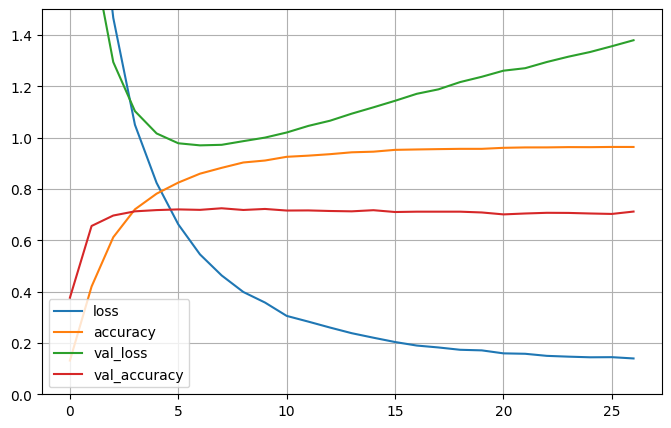

In [ ]:
#View training and validation curves
pd.DataFrame(m1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5) # set the vertical range to [0-1.5]
plt.show()

In [ ]:
#Testing
X_test_vectorized_array = X_test_vectorized.toarray()
model1.evaluate(X_test_vectorized_array, y_test)

236/236 [==============================] - 1s 3ms/step - loss: 1.9517 - accuracy: 0.6239


[1.9516669511795044, 0.6238715052604675]

In [ ]:
predict_x = model1.predict(X_test_vectorized_array) 
NN_predict = np.argmax(predict_x,axis=1)

236/236 [==============================] - 1s 3ms/step


In [ ]:
predict_x[-1]

array([1.1739704e-01, 2.5305802e-09, 1.6391095e-05, 3.1484870e-09,
       6.1764345e-06, 8.3047835e-09, 3.9244003e-12, 4.2131278e-06,
       1.3492374e-07, 5.7828781e-04, 1.7810249e-06, 9.8151822e-06,
       1.5004185e-08, 3.4424543e-06, 2.7370283e-03, 1.9854867e-01,
       6.6386157e-05, 1.8601065e-03, 7.0003567e-05, 6.7870045e-01,
       1.2649687e-09, 1.4102112e-09, 1.0657382e-10, 2.2018165e-09,
       2.0102293e-09, 1.3808326e-08, 5.6099387e-09, 2.0575668e-09,
       2.3446922e-10, 7.5252117e-11], dtype=float32)

In [ ]:
y_test

array([ 7,  5,  0, ...,  9,  6, 15])

In [ ]:
def plot_multiclass_roc(y_test, y_proba, n_classes, figsize=(17, 6)):

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values # Binarize classes
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize = 16)
    ax.set_ylabel('True Positive Rate', fontsize = 16)
    ax.set_title('Receiver operating characteristic example', fontsize = 20)
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %s' % (roc_auc[i], train_targets[i]))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

###Neural Network Confusion Matrix

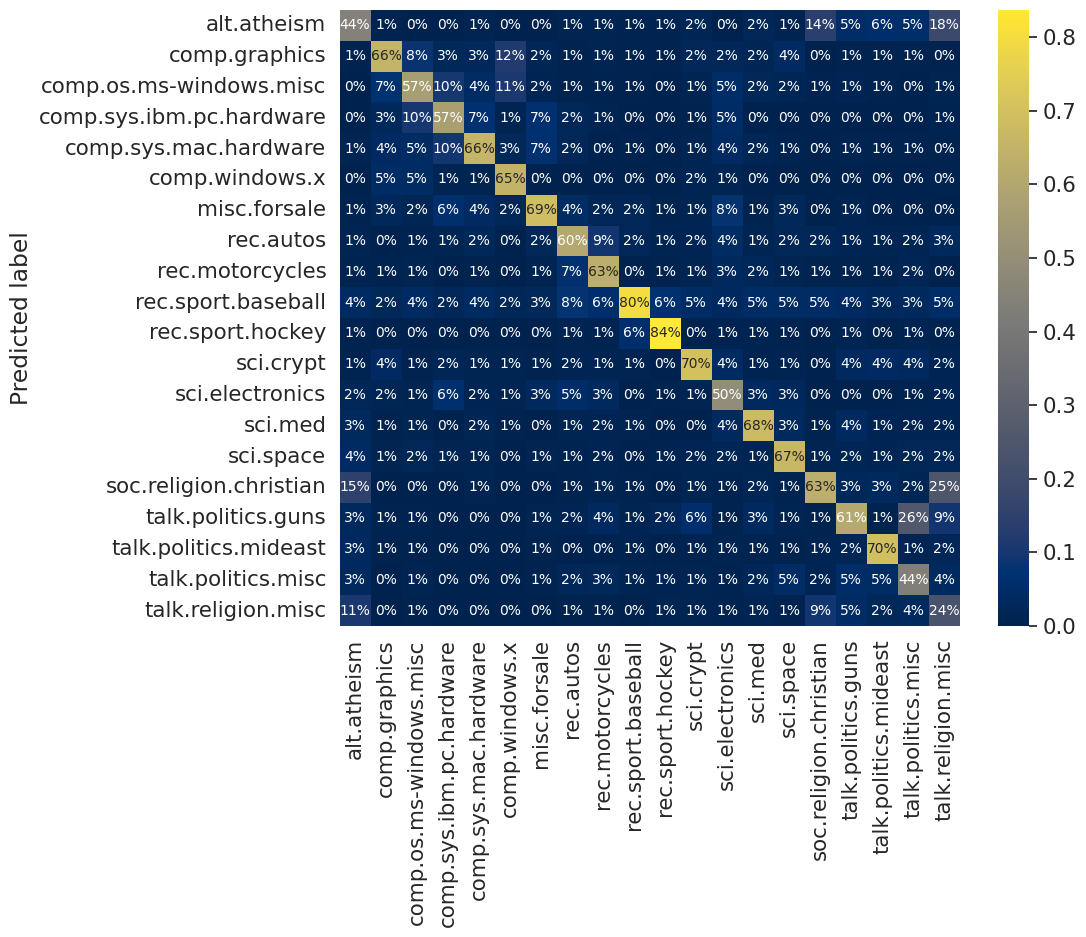

In [ ]:
conf_mat = confusion_matrix(y_test, NN_predict, normalize="true")

# Set the font size
plt.rcParams.update({'font.size': 10})

sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=train_targets, yticklabels=train_targets)
plt.ylabel("Predicted label")
plt.rcParams['figure.figsize'] = [12,10]

###Neural Network ROC Curve

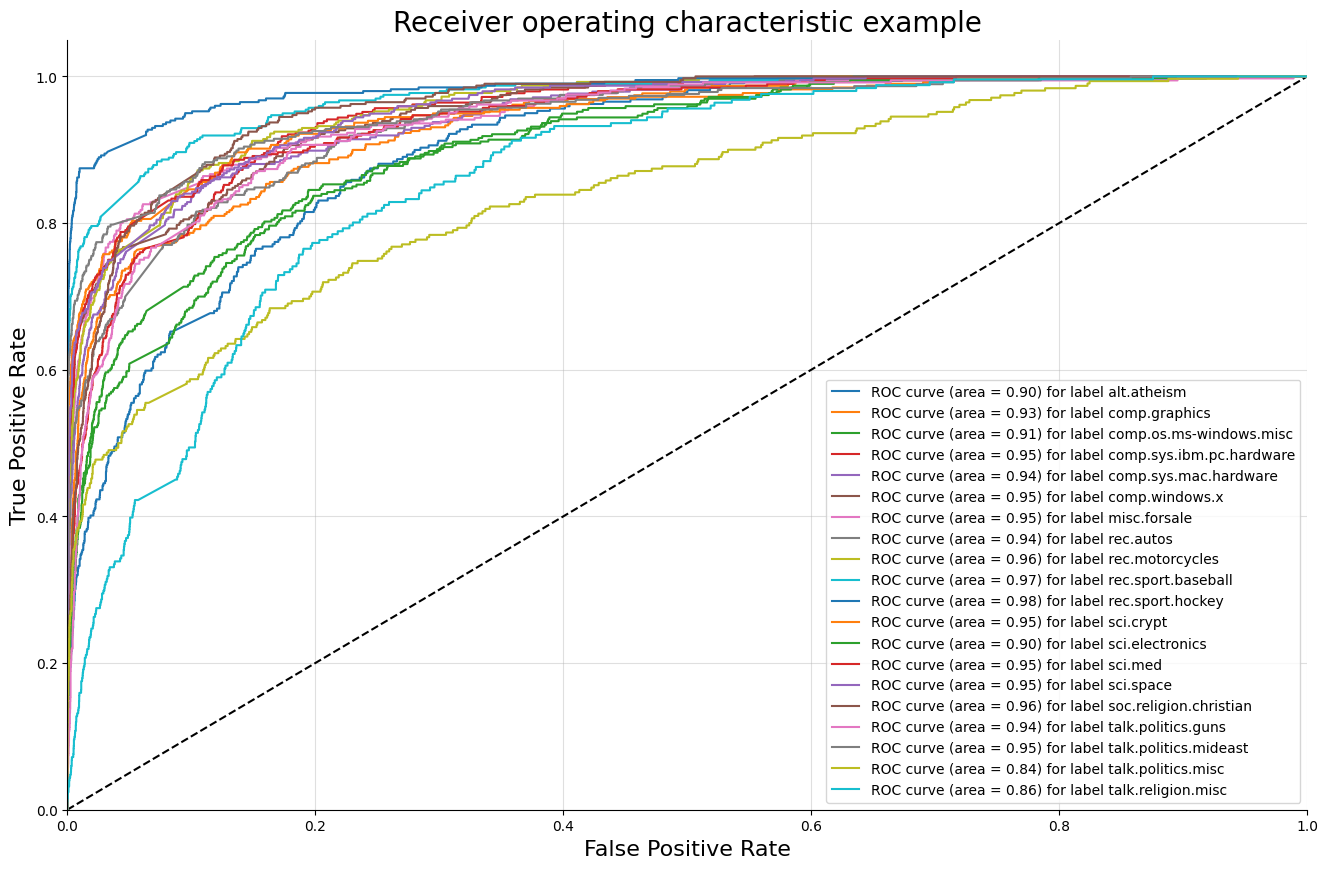

In [ ]:
plot_multiclass_roc(y_test, predict_x, n_classes=20, figsize=(16, 10))

## **Model 2: Naive Bayes**

Using pipeline with feature vectorizer and Naive Bayes. With random search optimizer - with cross validaon incorporated

In [ ]:
#Define pipeline including vectorizer and classifier
pipeline = Pipeline(
    [
        ("vectorizer", TfidfVectorizer()),
        ("clf", MultinomialNB()),
    ]
)
pipeline

#Define parameters to tune in hyperparameter tuning
parameters = {
    "vectorizer__max_df": (0.2, 0.4, 0.6, 0.8, 1.0), #proportion of documents including terms above which to ignore 
    "vectorizer__min_df": (1, 3, 5, 10), #will ignore terms that have a doc frequency lower than this number
    "vectorizer__ngram_range": ((1, 1), (1, 2)),  # unigrams or bigrams
    "vectorizer__norm": ("l1", "l2", "none"), #method or normalization
    "clf__alpha": np.logspace(-10, 10, 50),
}

#Run random search to find best parameters
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=parameters,
    n_iter=30, #number of parameter combinations to try
    random_state=42,
    n_jobs=2,
    verbose=1,
)


random_search.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.9/dist-package

RandomizedSearchCV(estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                             ('clf', MultinomialNB())]),
                   n_iter=30, n_jobs=2,
                   param_distributions={'clf__alpha': array([1.00000000e-10, 2.55954792e-10, 6.55128557e-10, 1.67683294e-09,
       4.29193426e-09, 1.09854114e-08, 2.81176870e-08, 7.19685673e-08,
       1.84206997e-07, 4.71486636e-07, 1.20679264e-06, 3.08884360e-06,
       7.9060...
       4.94171336e+04, 1.26485522e+05, 3.23745754e+05, 8.28642773e+05,
       2.12095089e+06, 5.42867544e+06, 1.38949549e+07, 3.55648031e+07,
       9.10298178e+07, 2.32995181e+08, 5.96362332e+08, 1.52641797e+09,
       3.90693994e+09, 1.00000000e+10]),
                                        'vectorizer__max_df': (0.2, 0.4, 0.6,
                                                               0.8, 1.0),
                                        'vectorizer__min_df': (1, 3, 5, 10),
                                        'vectorizer__ngram_range': ((1, 1),
                                                                    (1, 2)),
                                        'vectorizer__norm': ('l1', 'l2',
                                                             'none')},
                   random_state=42, verbose=1)

In [ ]:
print("Best parameter combination:")
best_parameters = random_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

Best parameter combination:
clf__alpha: 0.014563484775012445
vectorizer__max_df: 0.4
vectorizer__min_df: 3
vectorizer__ngram_range: (1, 2)
vectorizer__norm: l1


In [ ]:
test_accuracy = random_search.score(X_test_preprocessed, y_test)
print(
    "Accuracy of the best parameters using the inner CV of "
    f"the random search: {random_search.best_score_:.3f}"
)
print(f"Accuracy on test set: {test_accuracy:.3f}")

Accuracy of the best parameters using the inner CV of the random search: 0.728
Accuracy on test set: 0.677


As expected accuracy of validation set greater than accuracy of test set

In [ ]:
#Defining Tfidf vectorizer with tuned hyperparmeters
vectorizertuned = TfidfVectorizer(max_df=0.4, min_df= 1, norm ='l1', ngram_range = (1, 1))
X_train_vectorized_tuned = vectorizertuned.fit_transform(X_train_preprocessed)  
X_test_vectorized_tuned = vectorizertuned.transform(X_test_preprocessed)

clfNB2 = MultinomialNB(alpha = 0.014)
clfNB2.fit(X_train_vectorized_tuned, y_train)
clfNB2_predict = clfNB2.predict(X_test_vectorized_tuned)

### Naive Bayes Confusion Matrix

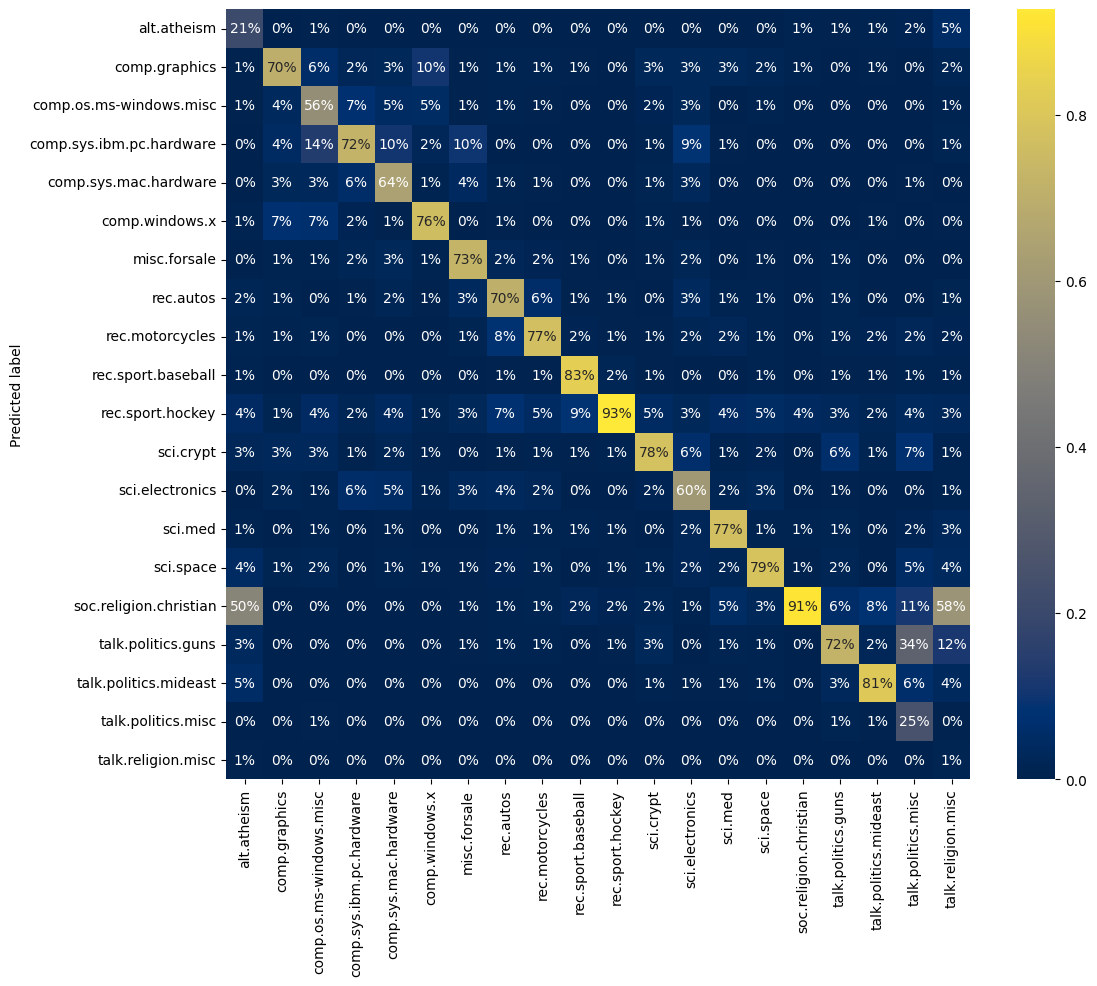

In [ ]:
conf_mat = confusion_matrix(y_test, clfNB2_predict, normalize="true")
plt.rcParams.update({'font.size': 10})
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=train_targets, yticklabels=train_targets)
plt.ylabel("Predicted label")
plt.rcParams['figure.figsize'] = [12,10]

In [ ]:
sum(clfNB2_predict == y_test) / len(y_test) # Accuracy 

0.6812267657992565

### Naive Bayes ROC Curve

In [ ]:
clfNB2_proba = clfNB2.predict_proba(X_test_vectorized_tuned)

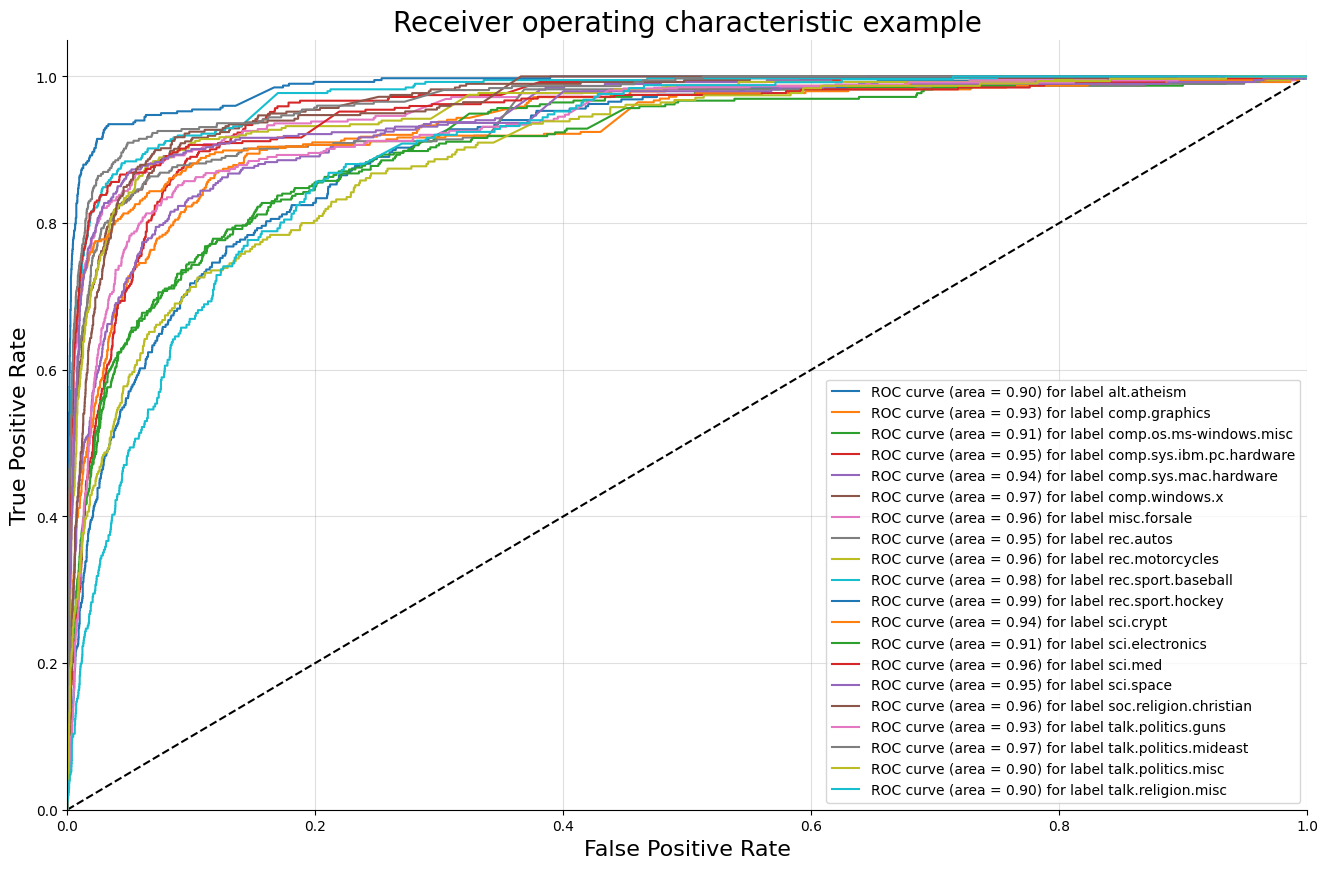

In [ ]:
plot_multiclass_roc(y_test, clfNB2_proba, n_classes=20, figsize=(16, 10))

In [ ]:
print(classification_report(y_test, clfNB2_predict, target_names=train_targets))

                          precision    recall  f1-score   support

             alt.atheism       0.68      0.21      0.32       319
           comp.graphics       0.65      0.70      0.68       389
 comp.os.ms-windows.misc       0.66      0.56      0.60       394
comp.sys.ibm.pc.hardware       0.58      0.72      0.64       392
   comp.sys.mac.hardware       0.74      0.64      0.69       385
          comp.windows.x       0.79      0.76      0.77       395
            misc.forsale       0.81      0.73      0.77       390
               rec.autos       0.75      0.70      0.73       396
         rec.motorcycles       0.75      0.77      0.76       398
      rec.sport.baseball       0.90      0.83      0.87       397
        rec.sport.hockey       0.58      0.93      0.71       399
               sci.crypt       0.69      0.78      0.73       396
         sci.electronics       0.65      0.60      0.63       393
                 sci.med       0.84      0.77      0.81       396
         

Religion misc are mostly being assigned to relion christian

## Model 3: KNN Classifier

In [ ]:
svd = TruncatedSVD(100)
svd.fit(X_train_vectorized)
X_train = svd.transform(X_train_vectorized)
X_test = svd.transform(X_test_vectorized)

In [ ]:
base_model_knn = KNeighborsClassifier()
base_model_knn.fit(X_train, y_train)
y_pred = base_model_knn.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.19      0.36      0.25       319
           1       0.37      0.49      0.42       389
           2       0.42      0.40      0.41       394
           3       0.49      0.43      0.46       392
           4       0.28      0.41      0.33       385
           5       0.47      0.53      0.50       395
           6       0.61      0.64      0.62       390
           7       0.43      0.45      0.44       396
           8       0.48      0.48      0.48       398
           9       0.55      0.55      0.55       397
          10       0.67      0.68      0.67       399
          11       0.67      0.38      0.49       396
          12       0.40      0.26      0.32       393
          13       0.45      0.56      0.50       396
          14       0.61      0.47      0.53       394
          15       0.58      0.53      0.55       398
          16       0.50      0.50      0.50       364
          17       0.80    

In [ ]:
# parameters for a knn
'''parameters = {"C": np.arange(0.1, 1.0,0.1), 
              "kernel":["linear", "poly", "rbf", "sigmoid"], 
              "probability": [False,True]}'''

k_range = list(range(1, 21))
parameters = dict(n_neighbors=k_range, 
                  weights = ['uniform', 'distance'],
                  algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute'])

cv_knn = GridSearchCV(KNeighborsClassifier(), parameters, cv = 5, scoring='accuracy')

cv_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(cv_knn.best_params_)

{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'distance'}


In [ ]:
knn = KNeighborsClassifier(**cv_knn.best_params_)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20, weights='distance')

In [ ]:
knn_pred = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)

In [ ]:
#Accuracy
sum(knn_pred == y_test) / len(y_test)

0.5011949017525226

###KNN Confusion Matrix

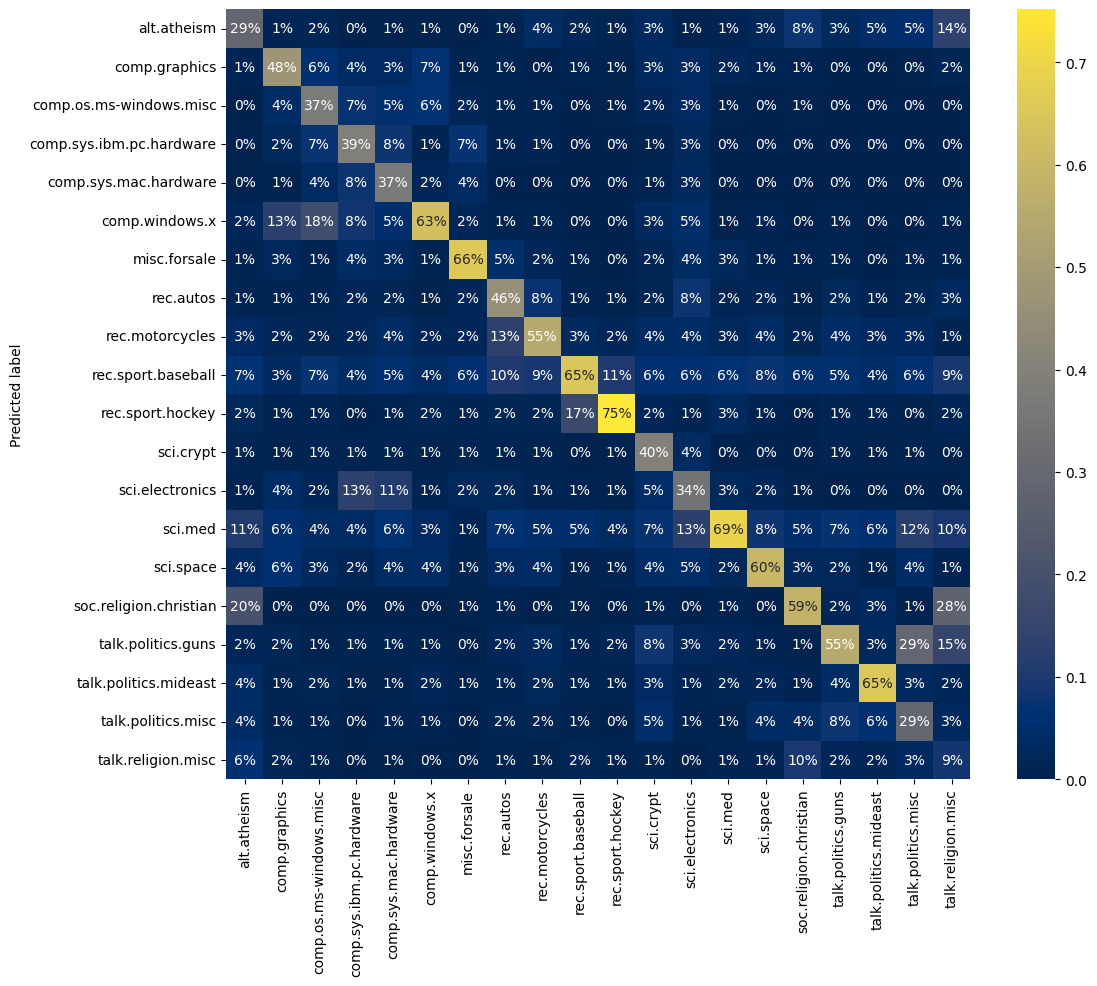

In [ ]:
conf_mat = confusion_matrix(y_test, knn_pred, normalize="true")
plt.rcParams.update({'font.size': 10})
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=train_targets, yticklabels=train_targets)
plt.ylabel("Predicted label")
plt.rcParams['figure.figsize'] = [12,10]

###KNN ROC Curve

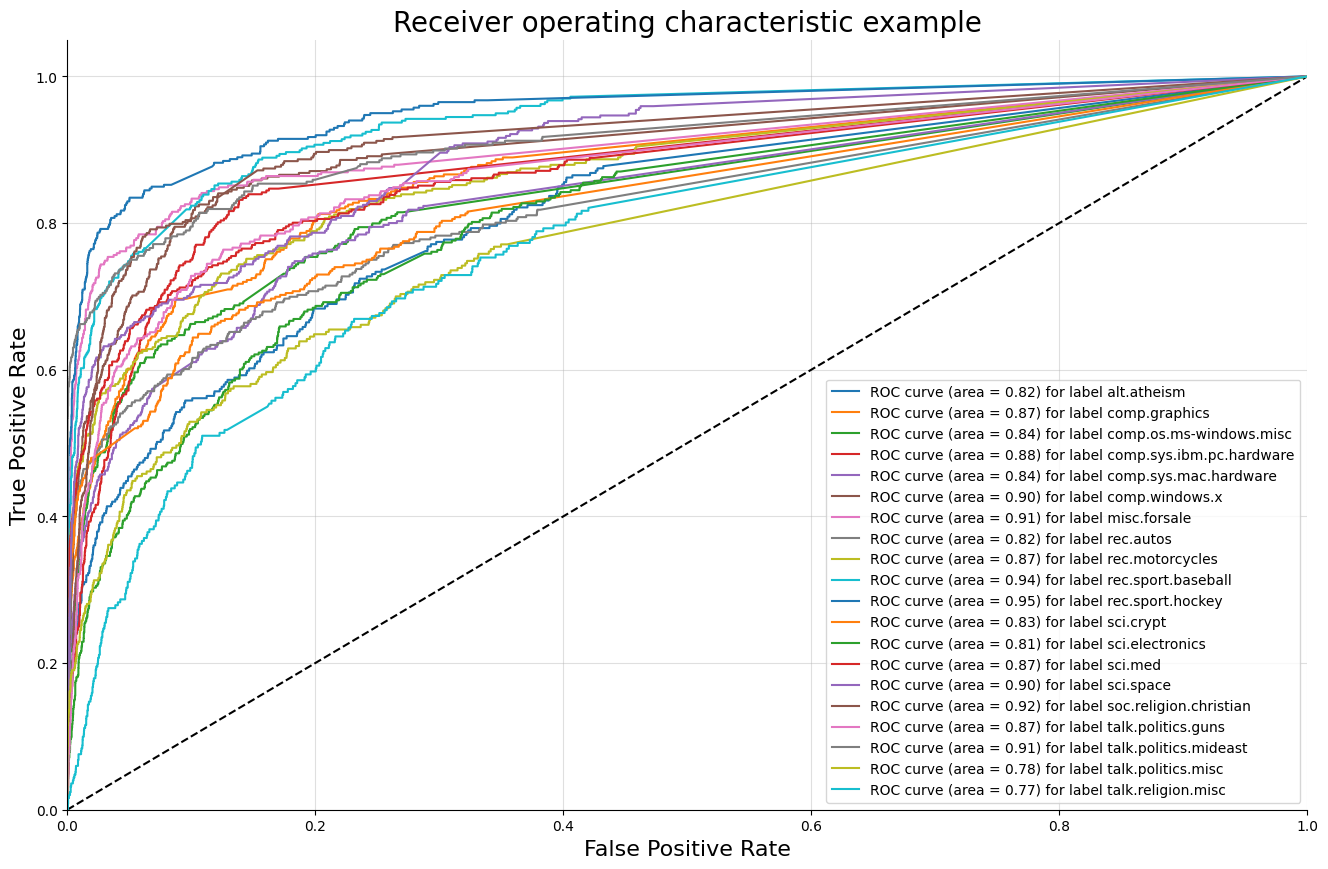

In [ ]:
plot_multiclass_roc(y_test, knn_proba, n_classes=20, figsize=(16, 10))

## Model 4: Decision Tree Classifier

In [ ]:
base_model_dt = DecisionTreeClassifier()
base_model_dt.fit(X_train, y_train)
y_pred = base_model_dt.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.20      0.19      0.20       319
           1       0.31      0.33      0.32       389
           2       0.37      0.32      0.34       394
           3       0.35      0.35      0.35       392
           4       0.37      0.33      0.35       385
           5       0.43      0.40      0.41       395
           6       0.51      0.49      0.50       390
           7       0.31      0.51      0.38       396
           8       0.41      0.41      0.41       398
           9       0.52      0.55      0.53       397
          10       0.67      0.64      0.66       399
          11       0.49      0.42      0.45       396
          12       0.25      0.24      0.25       393
          13       0.46      0.42      0.44       396
          14       0.37      0.35      0.36       394
          15       0.47      0.48      0.47       398
          16       0.37      0.36      0.36       364
          17       0.63    

In [ ]:
parameters = {'max_depth': list(range(1,21)),
    'min_samples_leaf': [5, 10, 20, 30, 50],
    'criterion': ["gini", "entropy"],
              'splitter': ["best", "random"]}
cv_dt = GridSearchCV(DecisionTreeClassifier(), parameters)
cv_dt.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': [5, 10, 20, 30, 50],
                         'splitter': ['best', 'random']})

In [ ]:
cv_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 19,
 'min_samples_leaf': 30,
 'splitter': 'best'}

In [ ]:
tuned_model_dt = DecisionTreeClassifier(**cv_dt.best_params_)
tuned_model_dt.fit(X_train, y_train)
y_pred = tuned_model_dt.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.27      0.31      0.29       319
           1       0.40      0.35      0.38       389
           2       0.48      0.32      0.38       394
           3       0.49      0.31      0.38       392
           4       0.38      0.35      0.36       385
           5       0.38      0.52      0.44       395
           6       0.48      0.56      0.52       390
           7       0.33      0.52      0.41       396
           8       0.45      0.46      0.46       398
           9       0.51      0.56      0.53       397
          10       0.64      0.64      0.64       399
          11       0.68      0.44      0.53       396
          12       0.21      0.21      0.21       393
          13       0.38      0.41      0.40       396
          14       0.41      0.49      0.44       394
          15       0.50      0.56      0.53       398
          16       0.43      0.48      0.45       364
          17       0.70    

In [ ]:
y_proba = tuned_model_dt.predict_proba(X_test)

###Decision Tree Confusion Matrix

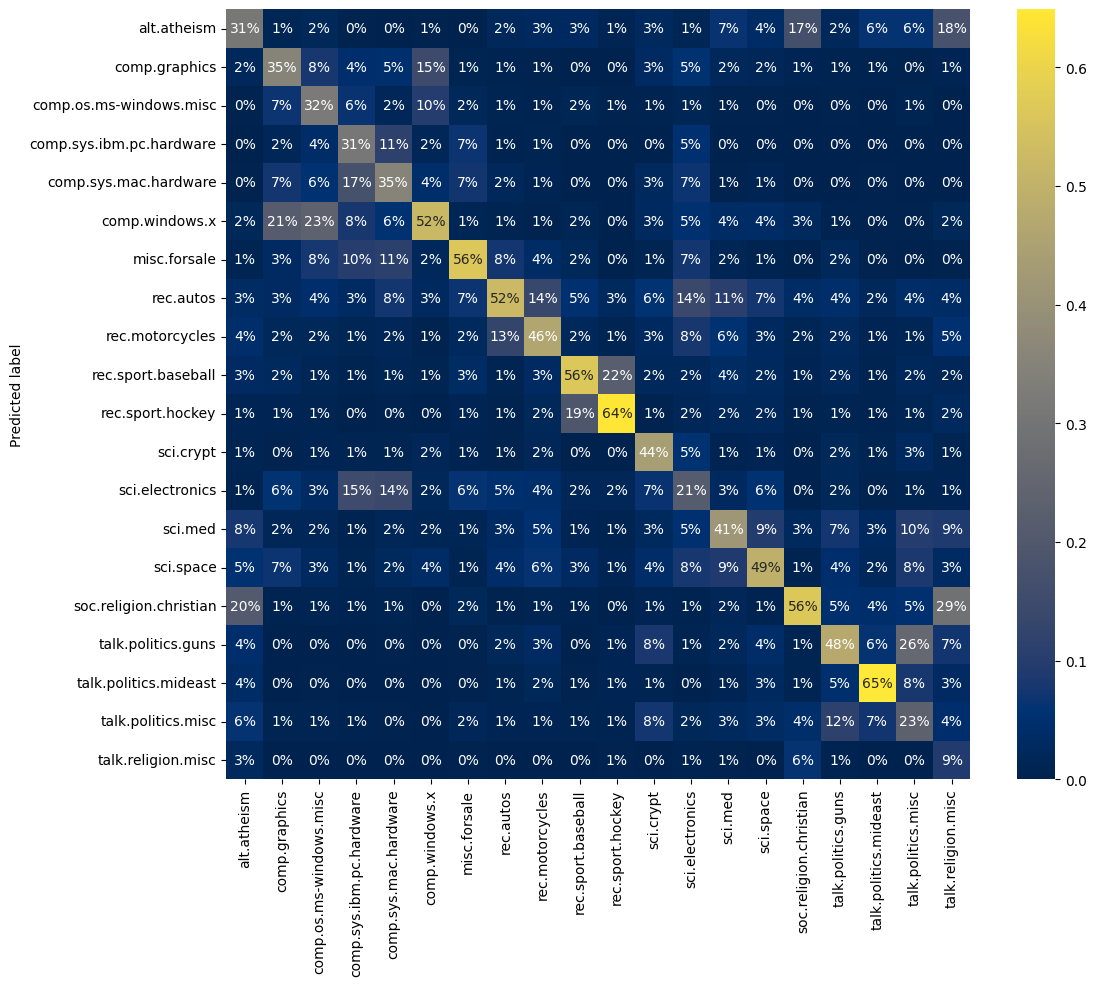

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred, normalize="true")
plt.rcParams.update({'font.size': 10})
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis", xticklabels=train_targets, yticklabels=train_targets)
plt.ylabel("Predicted label")
plt.rcParams['figure.figsize'] = [10,8]

###Decision Tree ROC Curve

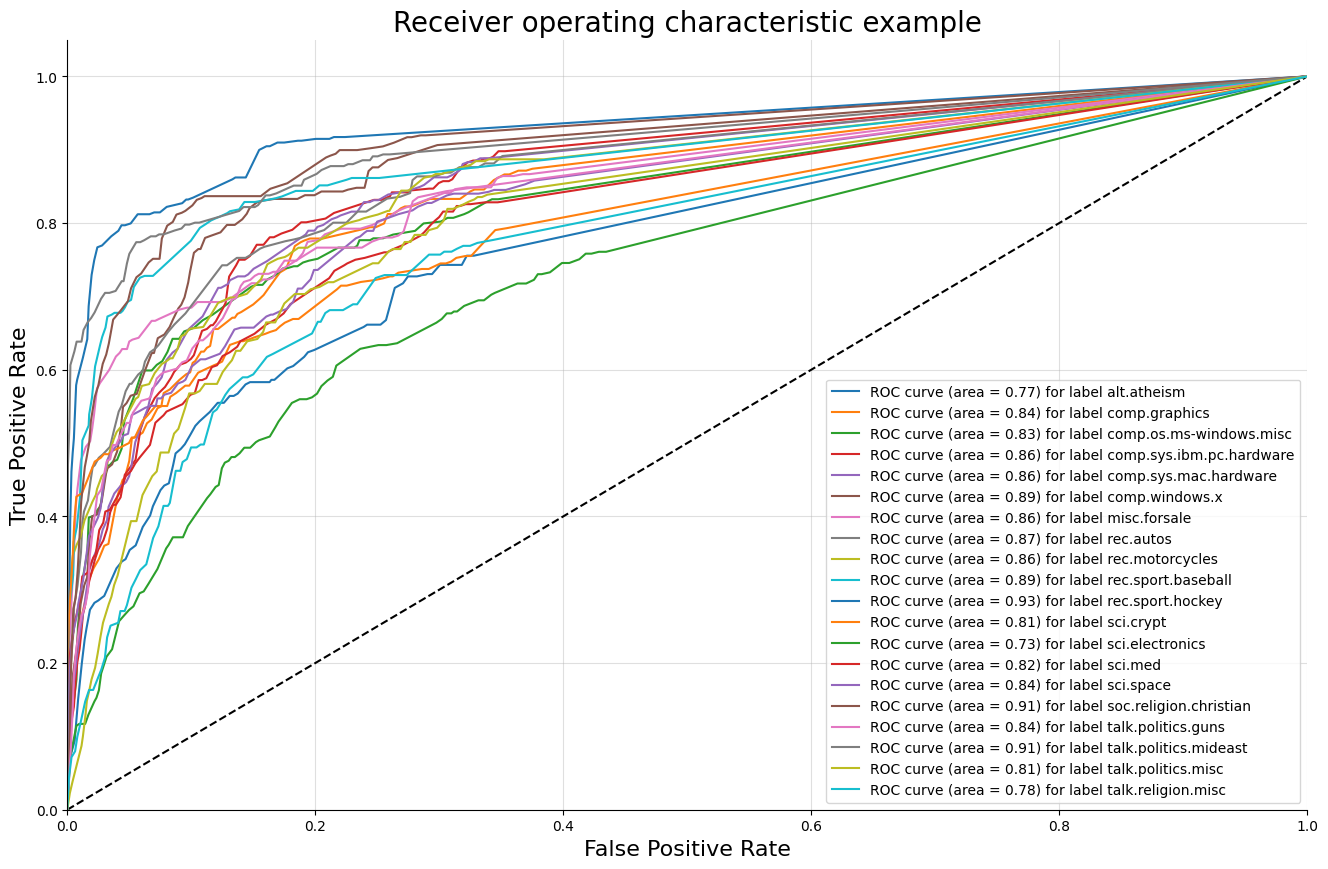

In [ ]:
plot_multiclass_roc(y_test, y_proba, n_classes=20, figsize=(16, 10))

3) Word Embeddings: Each word in the vocabulary is represented by a high-dimensional vector in such a way that words with similar meanings are represented by similar vectors. These vectors can be used as inputs to machine learning algorithms or deep learning models to improve the performance on natural language processing task: like text classification.

In [ ]:
# Preprocess training data
train_data = list(newsgroups_train.data)

processed_train_data = []
for doc in train_data:
    doc = remove_metadata(doc)
    tokens = tokenize(doc)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize(tokens)
    tokens = lowercase(tokens)
    tokens = remove_special_characters(tokens)
    tokens = remove_numbers(tokens)
    tokens = remove_stopwords(tokens)
    tokens = remove_numbers(tokens)
    processed_train_data.append(tokens)

# Train Word2Vec model on preprocessed training data
model = gensim.models.Word2Vec(processed_train_data, vector_size=100, window=5, min_count=5, workers=4)

# Get Word2Vec embeddings for training data
X_train_embeddings = []
for doc in processed_train_data:
    doc_embeddings = []
    for token in doc:
        if token in model.wv.key_to_index:
          doc_embeddings.append(model.wv.get_vector(token))

    X_train_embeddings.append(doc_embeddings)

# Preprocess test data
test_data = list(newsgroups_test.data)

processed_test_data = []
for doc in test_data:
    doc = remove_metadata(doc)
    tokens = tokenize(doc)
    tokens = remove_stopwords(tokens)
    tokens = lemmatize(tokens)
    tokens = lowercase(tokens)
    tokens = remove_special_characters(tokens)
    tokens = remove_numbers(tokens)
    tokens = remove_stopwords(tokens)
    tokens = remove_numbers(tokens)
    
    processed_test_data.append(tokens)

# Get Word2Vec embeddings for test data
X_test_embeddings = []
for doc in processed_test_data:
    doc_embeddings = []
    for token in doc:
      if token in model.wv.key_to_index:
          doc_embeddings.append(model.wv.get_vector(token))
    X_test_embeddings.append(doc_embeddings)

In [ ]:
similarity_score = model.wv.similarity("god", "religion")
similarity_score1 = model.wv.similarity("nasa", "space")
similarity_score2 = model.wv.similarity("hockey", "computer")
print("The similarity score between 'god' and 'atheist' is:", similarity_score)
print("The similarity score between 'nasa' and 'space' is:", similarity_score1)
print("The similarity score between 'hockey' and 'computer' is:", similarity_score2)

The similarity score between 'god' and 'atheist' is: 0.6515172
The similarity score between 'nasa' and 'space' is: 0.7130423
The similarity score between 'hockey' and 'computer' is: 0.12881264


In [ ]:
similar_words = model.wv.most_similar('nasa', topn=10)
print(similar_words)

[('gov', 0.891597330570221), ('goldin', 0.8863573670387268), ('jenks', 0.8789123296737671), ('fnal', 0.8676409125328064), ('llnl', 0.865219235420227), ('jpl', 0.8570941686630249), ('schuweiler', 0.8436803221702576), ('nih', 0.8248938322067261), ('hobie', 0.8168200850486755), ('bclarke', 0.8114110231399536)]


## **Model 5: CNN**

To apply CNN, pad the sequences of embeddings to a fixed length

In [ ]:
# Set the maximum sequence length
max_seq_length = 100

# Pad the sequences of embeddings to a fixed length
X_train_padded = pad_sequences(X_train_embeddings, maxlen=max_seq_length, padding='post', truncating='post', dtype='float32')
X_test_padded = pad_sequences(X_test_embeddings, maxlen=max_seq_length, padding='post', truncating='post', dtype='float32')

Defining and fitting CNN Model

In [ ]:
# Create a simple CNN model
embedding_size = 100
num_classes = 20

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(max_seq_length, embedding_size)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# One-hot encode the labels
y_train_onehot = to_categorical(y_train, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

# Train the model
model.fit(X_train_padded, y_train_onehot, validation_data=(X_test_padded, y_test_onehot), epochs=10, batch_size=32)


Epoch 1/10
354/354 [==============================] - 10s 26ms/step - loss: 2.3114 - accuracy: 0.2391 - val_loss: 1.6699 - val_accuracy: 0.4292
Epoch 2/10
354/354 [==============================] - 6s 18ms/step - loss: 1.6109 - accuracy: 0.4479 - val_loss: 1.4620 - val_accuracy: 0.4967
Epoch 3/10
354/354 [==============================] - 8s 22ms/step - loss: 1.3672 - accuracy: 0.5269 - val_loss: 1.4144 - val_accuracy: 0.5203
Epoch 4/10
354/354 [==============================] - 7s 19ms/step - loss: 1.2000 - accuracy: 0.5858 - val_loss: 1.3752 - val_accuracy: 0.5400
Epoch 5/10
354/354 [==============================] - 8s 23ms/step - loss: 1.0769 - accuracy: 0.6225 - val_loss: 1.3696 - val_accuracy: 0.5446
Epoch 6/10
354/354 [==============================] - 6s 18ms/step - loss: 0.9670 - accuracy: 0.6678 - val_loss: 1.3538 - val_accuracy: 0.5609
Epoch 7/10
354/354 [==============================] - 8s 22ms/step - loss: 0.8760 - accuracy: 0.6884 - val_loss: 1.4356 - val_accuracy: 0.535

Using Keras Tuner library to search for the optimal hyperparameters of the CNN.

In [ ]:
def build_model(hp):
    embedding_size = 100
    num_classes = 20

    model = keras.Sequential()

    # Add a convolutional layer
    model.add(layers.Conv1D(filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32), 
                            kernel_size=hp.Choice('conv1_kernel_size', values=[3, 5, 7]), 
                            activation='relu', input_shape=(max_seq_length, embedding_size)))
    
    # Add a max pooling layer
    model.add(layers.MaxPooling1D(pool_size=hp.Choice('pool1_size', values=[2, 3])))

    # Add another convolutional layer
    model.add(layers.Conv1D(filters=hp.Int('conv2_filters', min_value=32, max_value=128, step=32), 
                            kernel_size=hp.Choice('conv2_kernel_size', values=[3, 5, 7]), 
                            activation='relu'))
    
    # Add another max pooling layer
    model.add(layers.Flatten())

    # Add a dense layer
    model.add(layers.Dense(units=hp.Int('dense_units', min_value=64, max_value=256, step=64), activation='relu'))

    # Add dropout
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))

    # Add the output layer
    model.add(layers.Dense(units=num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), metrics=['accuracy'])

    return model

Hyperparameter Optimization using RandomSearch

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='newsgroups_classification')

tuner.search(X_train_padded, y_train_onehot, validation_data=(X_test_padded, y_test_onehot), epochs=10, batch_size=32)

Trial 10 Complete [00h 01m 41s]
val_accuracy: 0.5164631009101868

Best val_accuracy So Far: 0.5535050630569458
Total elapsed time: 00h 26m 35s


In [ ]:
tuner.results_summary()

Results summary
Results in my_dir/newsgroups_classification
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 07 summary
Hyperparameters:
conv1_filters: 128
conv1_kernel_size: 5
pool1_size: 2
conv2_filters: 128
conv2_kernel_size: 3
dense_units: 192
dropout: 0.1
learning_rate: 0.001
Score: 0.5535050630569458

Trial 01 summary
Hyperparameters:
conv1_filters: 128
conv1_kernel_size: 3
pool1_size: 3
conv2_filters: 64
conv2_kernel_size: 7
dense_units: 128
dropout: 0.1
learning_rate: 0.001
Score: 0.543547511100769

Trial 08 summary
Hyperparameters:
conv1_filters: 96
conv1_kernel_size: 5
pool1_size: 3
conv2_filters: 32
conv2_kernel_size: 3
dense_units: 64
dropout: 0.2
learning_rate: 0.001
Score: 0.5392990112304688

Trial 06 summary
Hyperparameters:
conv1_filters: 32
conv1_kernel_size: 5
pool1_size: 2
conv2_filters: 96
conv2_kernel_size: 7
dense_units: 256
dropout: 0.2
learning_rate: 0.001
Score: 0.5212426781654358

Trial 09 summary
Hyperparameters:
conv1_filters: 32

Based on the output, the best trial was Trial 07 with a validation accuracy of 0.55, which used the following hyperparameters:

conv1_filters: 128
conv1_kernel_size: 5
pool1_size: 2
conv2_filters: 128
conv2_kernel_size: 3

###CNN Learning Curve

Epoch 1/10
354/354 [==============================] - 7s 20ms/step - loss: 0.5849 - accuracy: 0.7924 - val_loss: 1.5621 - val_accuracy: 0.5528
Epoch 2/10
354/354 [==============================] - 8s 22ms/step - loss: 0.5432 - accuracy: 0.8071 - val_loss: 1.6787 - val_accuracy: 0.5520
Epoch 3/10
354/354 [==============================] - 7s 19ms/step - loss: 0.4899 - accuracy: 0.8239 - val_loss: 1.7145 - val_accuracy: 0.5593
Epoch 4/10
354/354 [==============================] - 8s 23ms/step - loss: 0.4554 - accuracy: 0.8396 - val_loss: 1.7099 - val_accuracy: 0.5571
Epoch 5/10
354/354 [==============================] - 7s 19ms/step - loss: 0.4104 - accuracy: 0.8528 - val_loss: 1.8288 - val_accuracy: 0.5560
Epoch 6/10
354/354 [==============================] - 8s 23ms/step - loss: 0.3827 - accuracy: 0.8615 - val_loss: 1.8841 - val_accuracy: 0.5474
Epoch 7/10
354/354 [==============================] - 8s 22ms/step - loss: 0.3646 - accuracy: 0.8698 - val_loss: 1.9871 - val_accuracy: 0.5527

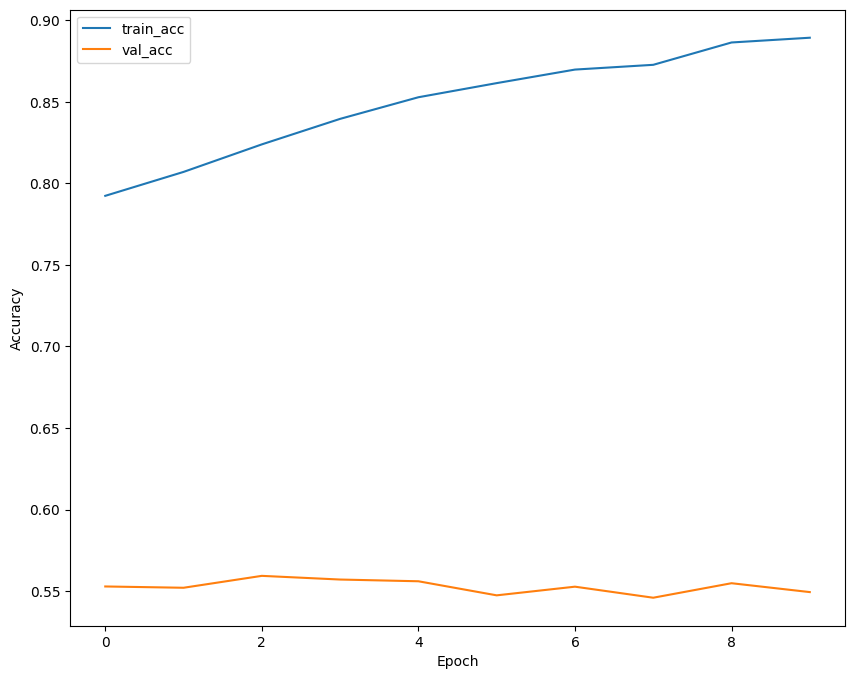

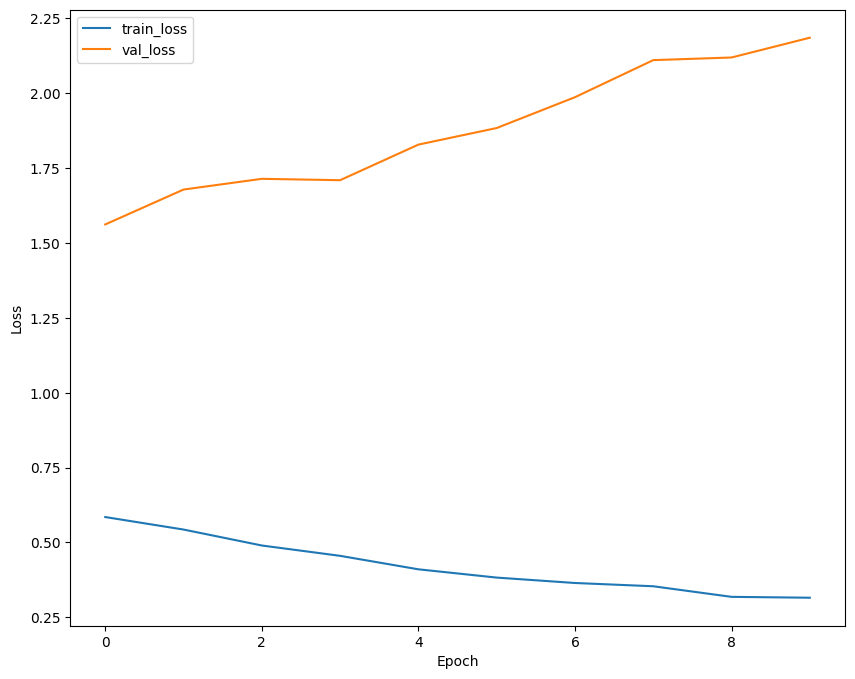

In [ ]:
# Train the model and get the history object
history = model.fit(X_train_padded, y_train_onehot, validation_data=(X_test_padded, y_test_onehot), epochs=10, batch_size=32)

# Get the training and validation accuracy for each epoch
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the training and validation loss for each epoch
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation accuracy
plt.plot(train_acc, label='train_acc')
plt.plot(val_acc, label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


###CNN Confusion Matrix

236/236 [==============================] - 1s 5ms/step


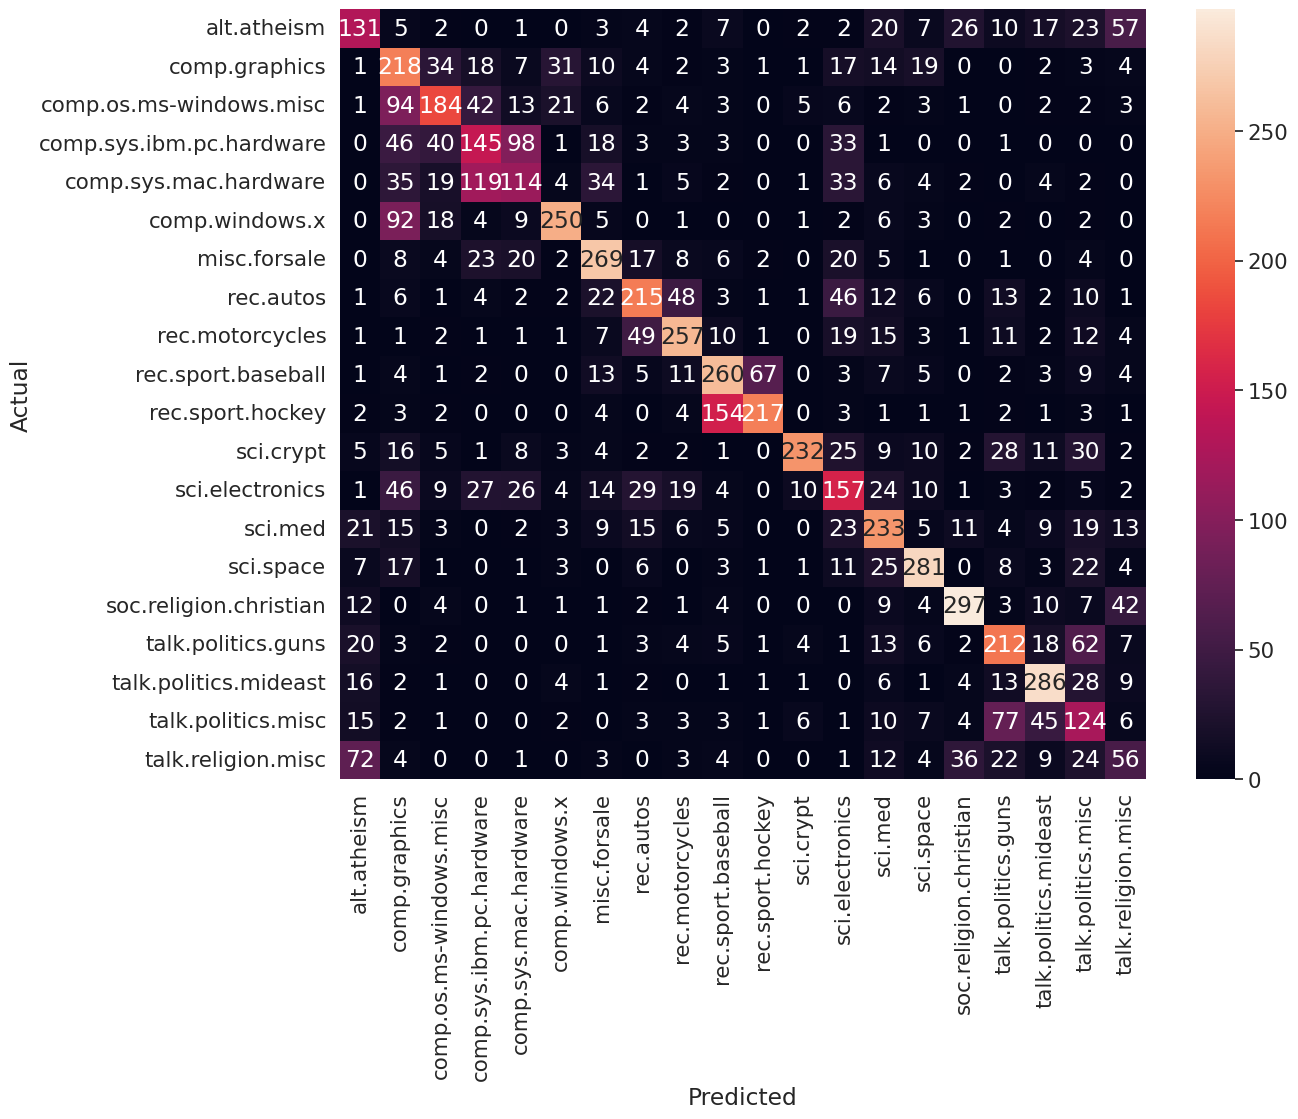

In [ ]:
# Predict classes using the test set
y_pred = np.argmax(model.predict(X_test_padded), axis=-1)

# Generate confusion matrix
cm = confusion_matrix(np.argmax(y_test_onehot, axis=1), y_pred)

# Define class labels
labels = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

# Plot confusion matrix
plt.figure(figsize=(13, 10))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Evaluation Metrics

In [ ]:
#from sklearn.metrics import classification_report
y_pred = model.predict(X_test_padded)
y_pred_labels = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_labels))


236/236 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.43      0.41      0.42       319
           1       0.35      0.56      0.43       389
           2       0.55      0.47      0.51       394
           3       0.38      0.37      0.37       392
           4       0.38      0.30      0.33       385
           5       0.75      0.63      0.69       395
           6       0.63      0.69      0.66       390
           7       0.59      0.54      0.57       396
           8       0.67      0.65      0.66       398
           9       0.54      0.65      0.59       397
          10       0.74      0.54      0.63       399
          11       0.88      0.59      0.70       396
          12       0.39      0.40      0.39       393
          13       0.54      0.59      0.56       396
          14       0.74      0.71      0.73       394
          15       0.77      0.75      0.76       398
          16       0.51   

## **Model 6: Ensemble Model(CNN and SVM)**

Bag of Words: The code applies preprocessing techniques and the BoW technique to represent text data as a feature matrix for text categorization. The same set of unique words are used in both the training and test feature matrices.

Use CountVectorizer to extract Bag-of-Words (BoW) features, limiting the maximum number of features to 5000. These features will be used to train the SVM model. 

Reshape the BoW data to fit the CNN.

In [ ]:
vectorizer1 = CountVectorizer(max_features=5000)

# Fit and transform the training dataset
# Transform the test dataset

X_train_bow = vectorizer1.fit_transform(X_train_preprocessed)
X_test_bow = vectorizer1.transform(X_test_preprocessed)

Convolutional Neural Network (CNN): A simple CNN model consisting of two convolutional layers, two max pooling layers, a flatten layer, a fully connected layer and a dropout layer. Finally there is an output layer with Softmax activation for classification. The CNN model is mainly used to capture local features in the text

In [ ]:
# Prepare input data for CNN
# Reshape the input data for CNN (num_samples, height, width, num_channels)
X_train_cnn = np.expand_dims(X_train_bow.toarray().reshape(-1, 50, 100), axis=3)
X_test_cnn = np.expand_dims(X_test_bow.toarray().reshape(-1, 50, 100), axis=3)

Train the CNN model

Convert the text data to a Bag-of-Words model (Bag-of-Words), and then resize it to a 2D shape (50x100). In this case, the text data can be viewed as a simplified two-dimensional image where each cell represents the number of occurrences of a particular word.

In [ ]:
# Initialize the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(50, 100, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
142/142 [==============================] - 71s 495ms/step - loss: 2.7457 - accuracy: 0.2319 - val_loss: 2.0831 - val_accuracy: 0.4397
Epoch 2/10
142/142 [==============================] - 83s 587ms/step - loss: 1.9324 - accuracy: 0.4491 - val_loss: 1.6376 - val_accuracy: 0.5320
Epoch 3/10
142/142 [==============================] - 80s 563ms/step - loss: 1.5797 - accuracy: 0.5476 - val_loss: 1.4953 - val_accuracy: 0.5727
Epoch 4/10
142/142 [==============================] - 69s 486ms/step - loss: 1.3314 - accuracy: 0.6068 - val_loss: 1.3696 - val_accuracy: 0.6036
Epoch 5/10
142/142 [==============================] - 74s 521ms/step - loss: 1.1210 - accuracy: 0.6730 - val_loss: 1.3678 - val_accuracy: 0.5988
Epoch 6/10
142/142 [==============================] - 69s 483ms/step - loss: 0.9834 - accuracy: 0.7070 - val_loss: 1.3207 - val_accuracy: 0.6142
Epoch 7/10
142/142 [==============================] - 67s 471ms/step - loss: 0.8466 - accuracy: 0.7473 - val_loss: 1.3629 - val_ac

A linear kernel SVM model for BoW features. 

For text classification tasks.

In [ ]:
# Train the SVM model
# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1, probability=True)

# Train the model
svm_model.fit(X_train_bow, y_train)

# Predict on the test dataset
y_pred_svm = svm_model.predict(X_test_bow)

In [ ]:
# Calculate the accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Accuracy: {svm_accuracy}")

SVM Test Accuracy: 0.4840679766330324


Ensemble method: By weighting the prediction results of CNN and SVM models, the final prediction result is obtained. This ensemble approach can take full advantage of the strengths of both models and improve classification performance.

Stratified K-fold cross-validation (StratifiedKFold) was used to evaluate model performance. This approach ensures a consistent class distribution within each fold and provides more stable model evaluation results.

In [ ]:
# Initialize the StratifiedKFold
n_splits = 5
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, val_index in kfold.split(X_train_cnn, y_train):
    X_train_cnn_fold = X_train_cnn[train_index]
    y_train_fold = y_train[train_index]
    X_val_cnn_fold = X_train_cnn[val_index]
    y_val_fold = y_train[val_index]

    X_train_bow_fold = X_train_bow[train_index]
    X_val_bow_fold = X_train_bow[val_index]

    # Train the CNN model
    cnn_model.fit(X_train_cnn_fold, y_train_fold, epochs=10, batch_size=64, verbose=0)

    # Train the SVM model
    svm_model.fit(X_train_bow_fold, y_train_fold)

    # Make predictions using both models
    cnn_prob = cnn_model.predict(X_val_cnn_fold)
    svm_prob = svm_model.predict_proba(X_val_bow_fold)

    # Combine the predictions
    ensemble_prob = (cnn_prob + svm_prob) / 2
    ensemble_pred = np.argmax(ensemble_prob, axis=1)

    # Calculate the evaluation metrics
    accuracy_scores.append(accuracy_score(y_val_fold, ensemble_pred))
    precision_scores.append(precision_score(y_val_fold, ensemble_pred, average='weighted'))
    recall_scores.append(recall_score(y_val_fold, ensemble_pred, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, ensemble_pred, average='weighted'))

# Calculate the average evaluation metrics
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

print(f"Average Ensemble Test Accuracy: {avg_accuracy}")
print(f"Average Ensemble Test Precision: {avg_precision}")
print(f"Average Ensemble Test Recall: {avg_recall}")
print(f"Average Ensemble Test F1 Score: {avg_f1}")

71/71 [==============================] - 5s 76ms/step
Average Ensemble Test Accuracy: 0.9126797014830903
Average Ensemble Test Precision: 0.9230298174974301
Average Ensemble Test Recall: 0.9126797014830903
Average Ensemble Test F1 Score: 0.9151208128805504


###Ensemble Model Confusion Matrix 

236/236 [==============================] - 15s 64ms/step


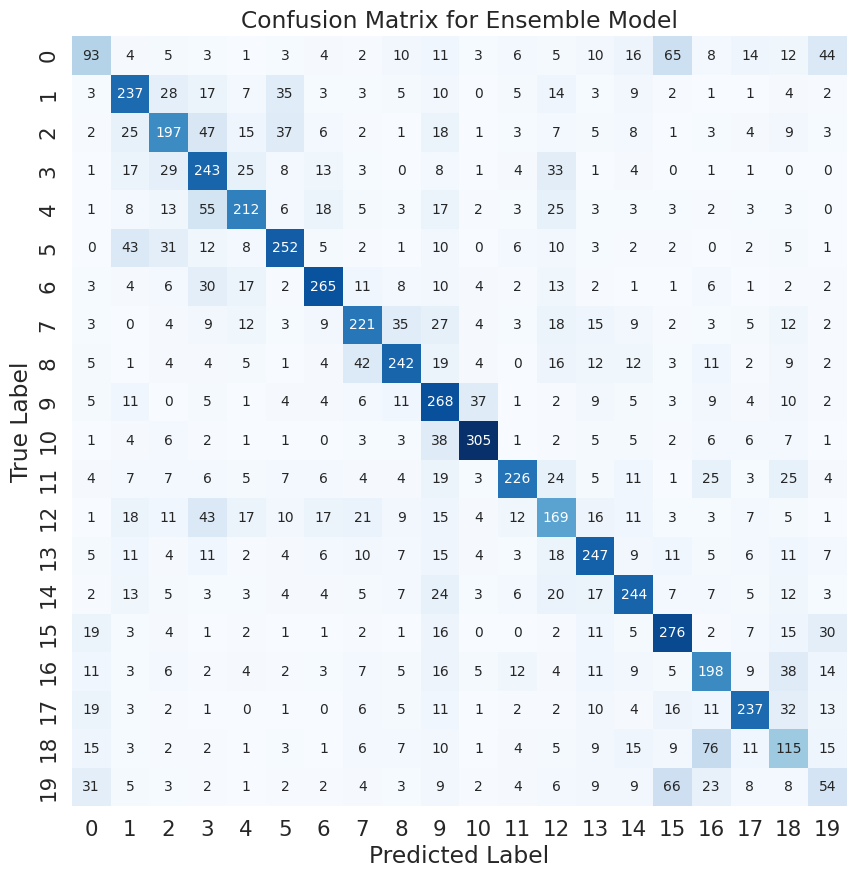

In [ ]:
# Make predictions using both models
cnn_prob_test = cnn_model.predict(X_test_cnn)
svm_prob_test = svm_model.predict_proba(X_test_bow)

# Combine the predictions
ensemble_prob_test = (cnn_prob_test + svm_prob_test) / 2
ensemble_pred_test = np.argmax(ensemble_prob_test, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, ensemble_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=range(20), yticklabels=range(20))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()